In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

%matplotlib inline

# Week 2 - Assignment

Apply what we have covered to build a linear regression model for the data in test_dataset.csv file. Use x to predict the value of y.

The steps you take may look similar to:

* Load the data (done)
* Plot and inspect the data to understand it's structure
* Choose features and construct your dataset (you can try different powers, visual inspection may suggest other mathematical functions to try)
* Calculate the coefficients and mean squared error

You could also split the dataset up into training and validation sets but for this week it is not required. This will be covered further in future weeks.

In [2]:
df = pd.read_csv('test_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
Unnamed: 0    2000 non-null int64
x             2000 non-null float64
y             2000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


We have two columns named x and y with 2000 values.

We can first visualize the relationship between our feature (x) and the value we are trying to predict (y).

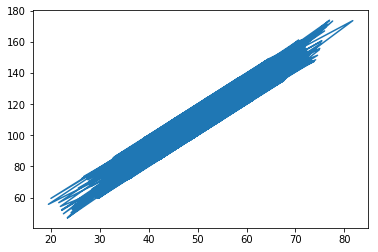

In [3]:
plt.plot(df['x'], df['y'])

The default display option is connecting the points with a line. Because the values are not ordered the line goes back and forth completely obscuring the relationship. Below we will change the symbol used to unconnected blue points.

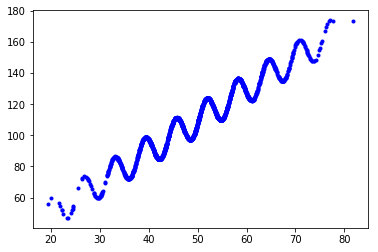

In [4]:
plt.plot(df['x'], df['y'], 'b.')

This is much more clear. The values appear to be positively correlated (y increases as x increases) and there also appears to be a cyclical relationship. Let's first build a simple model with just the linear relationship and any intercept. Essentially, exactly what we did during class.

In [24]:
x = df['x'].values.reshape((2000,1))
y = df['y'].values.reshape((2000,1))

x_intercept = np.hstack([np.ones(x.shape), x])


coeff, residuals, _, _ = np.linalg.lstsq(x_intercept, y)
print(coeff)

[[ 9.98898016]
 [ 2.0028102 ]]


The relationship appears  to be roughly y = 10 + 2x

The sum of the squared residuals is [ 101080.69792027]


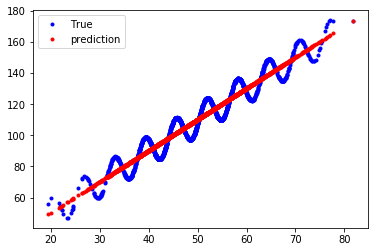

In [23]:
plt.plot(x, y, 'b.', label='True')
plt.plot(x, np.dot(x_intercept, coeff), 'r.', label='prediction')
plt.legend()
print('The sum of the squared residuals is', residuals)

This model performs very well but does not include the cyclical component. Many of you correctly guessed that a sine transformation of the data would be an appropriate next step. We can plot the errors against x to confirm.

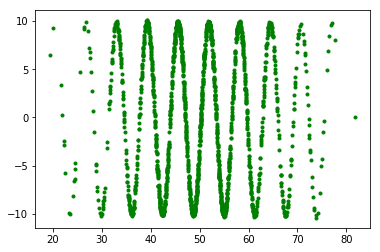

In [20]:
plt.plot(x, y - np.dot(x_intercept, coeff), 'g.')

We can add a new feature with a sine transformation of x.

[[ 10.00103012]
 [  1.99990864]
 [ 10.00111136]]
The sum of the squared residuals is [ 19.42453049]


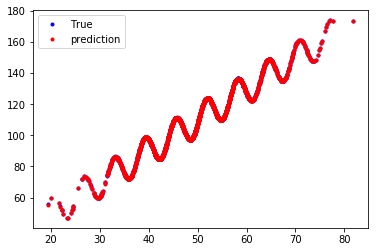

In [25]:
x_sine = np.hstack([np.ones(x.shape), x, np.sin(x)])


coeff, residuals, _, _ = np.linalg.lstsq(x_sine, y)
print(coeff)

plt.plot(x, y, 'b.', label='True')
plt.plot(x, np.dot(x_sine, coeff), 'r.', label='prediction')
plt.legend()
print('The sum of the squared residuals is', residuals)

This model very closely fits the data for all points.

This would be a full and complete response. 